# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:
**Elen Tesfai**

### GitHub Repository:
[https://github.com/Elen-tesfai/web-scraping](https://github.com/Elen-tesfai/web-scraping)

---

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1: Extract Article HTML and Save as .pkl File

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pickle

# Step 1: Fetch the article HTML from the URL
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(url)

# Check if the request was successful (Status code 200)
if response.status_code == 200:
    print("Successfully fetched the webpage.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Save the parsed HTML to a .pkl file
with open('article_html.pkl', 'wb') as file:
    pickle.dump(soup, file)

print("HTML content successfully saved to article_html.pkl")

Successfully fetched the webpage.
HTML content successfully saved to article_html.pkl


## Question 2: Read HTML and Print Text Using .get_text()

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [31]:
import pickle

# Step 1: Read the HTML from the .pkl file
with open('article_html.pkl', 'rb') as file:
    soup = pickle.load(file)

# Step 2: Extract the text from the HTML
article_text = soup.get_text(separator=' ', strip=True)

# Step 3: Print the article text (or just a portion for clarity)
print(article_text[:1000])  # Print the first 1000 characters for brevity

How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out. Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers! Laser Headlights?! BWM’s prototype laser headlight assemblies undergoing testing. The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the f

#### Explanation for **Question 2: Extracting Article HTML and Displaying Text**

In this task, we read the article's HTML content from the file saved in **Question 1**. Using the **`pickle`** module, we loaded the HTML content, which was previously saved as a `.pkl` file. We then used **BeautifulSoup's `.get_text()`** method to extract all the text content from the HTML, removing any HTML tags, and presenting the plain text.

We also included some formatting options for the `.get_text()` method:

- **`separator=' '`**: This ensures that the extracted text uses spaces between the segments where there were originally line breaks or HTML tags.
- **`strip=True`**: This removes any leading or trailing whitespace from the extracted text.

The result is the full article text, displayed in a readable format, with the first 1000 characters printed for brevity. The output provided gives us an overview of the article's content, starting from the header section and continuing into the main body.

For example, the beginning of the article includes the title "**How Laser Headlights Work**," publication date, and some introductory paragraphs discussing the technology of laser headlights. The output might look something like this:

## Question 3: Tokenize the text and print the most frequent tokens
Here, we need to tokenize the text and find the most frequent tokens. We can use spaCy to tokenize the text.

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

#### Code for Tokenizing Text:

In [32]:
# Importing spaCy and the Counter library
import spacy
from collections import Counter

# Step 1: Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Step 2: Process the article text using spaCy
doc = nlp(article_text)

# Step 3: Tokenize and count the frequency of each token (filtered for stopwords, punctuation, and whitespace)
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 4: Get the most common tokens
token_counts = Counter(tokens)

# Step 5: Get the 5 most frequent tokens
most_common_tokens = token_counts.most_common(5)

# Step 6: Print the most common tokens and their frequencies
print("Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Most Frequent Tokens:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


### Explanation for **Question 3: Token Frequency with spaCy**

In this task, we used **spaCy** to process the article text and identified the 5 most frequent tokens (converted to lowercase). We removed **stopwords**, **punctuation**, and **whitespace** to ensure the analysis focused on meaningful words. The five most frequent tokens and their corresponding frequencies are as follows:

- **comment**: 136 occurrences  
- **march**: 133 occurrences  
- **2021**: 133 occurrences  
- **says**: 132 occurrences  
- **report**: 130 occurrences

These frequent tokens give us insight into the structure of the article. Words like **"comment"**, **"says"**, and **"report"** suggest the article contains **quotes**, **reports**, and **reader interaction**. The appearance of **"march"** and **"2021"** shows references to specific **timeframes**.  

## Question 4: Find the most frequent lemmas and print them
A lemma is the base form of a word (e.g., "running" becomes "run"). This question asks us to find the most frequent lemmas instead of tokens.

### Code for Lemmatization:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [33]:
# Importing spaCy and Counter for frequency counting
import spacy
from collections import Counter

# Step 1: Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Step 2: Process the article text using spaCy
doc = nlp(article_text)

# Step 3: Extract the lemmatized tokens and filter out stopwords, punctuation, and whitespace
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 4: Count the frequency of each lemma
lemma_counts = Counter(lemmas)

# Step 5: Print the top 5 most frequent lemmas
print("Most Frequent Lemmas:")
for lemma, freq in lemma_counts.most_common(5):
    print(f"Lemma: {lemma}, Frequency: {freq}")

# Step 6: Print all the lemmas with their frequencies
print("\nAll Lemmas and Frequencies:")
for lemma, freq in lemma_counts.items():
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most Frequent Lemmas:
Lemma: comment, Frequency: 158
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130

All Lemmas and Frequencies:
Lemma: laser, Frequency: 72
Lemma: headlights, Frequency: 6
Lemma: work, Frequency: 19
Lemma: |, Frequency: 4
Lemma: hackaday, Frequency: 15
Lemma: skip, Frequency: 1
Lemma: content, Frequency: 1
Lemma: primary, Frequency: 1
Lemma: menu, Frequency: 1
Lemma: home, Frequency: 6
Lemma: blog, Frequency: 2
Lemma: hackaday.io, Frequency: 3
Lemma: tindie, Frequency: 2
Lemma: prize, Frequency: 3
Lemma: submit, Frequency: 2
Lemma: search, Frequency: 5
Lemma: march, Frequency: 133
Lemma: 27, Frequency: 5
Lemma: 2021, Frequency: 133
Lemma: 130, Frequency: 4
Lemma: comment, Frequency: 158
Lemma: lewin, Frequency: 2
Lemma: day, Frequency: 11
Lemma: 22, Frequency: 79
Lemma: think, Frequency: 17
Lemma: onward, Frequency: 1
Lemma: automotive, Frequency: 10
Lemma: technology, Frequency: 17
Lemma: headlight, Fr

### Explanation for **Question 4: Most Frequent Lemmas**

In this task, we used **spaCy** to extract the **lemmas** (base forms) of words from the article text. We excluded stopwords, punctuation, and whitespace to focus on meaningful content.

**Steps Taken:**
1. **Load spaCy's model**: We used `en_core_web_sm` to process the article text.
2. **Lemmatization**: Extracted the base form of each word.
3. **Filtering**: Removed stopwords, punctuation, and whitespace.
4. **Counting Frequencies**: Used `Counter` to count how often each lemma appeared.
5. **Displaying Results**: Printed the top 5 most frequent lemmas.

**Result**: 
The most frequent lemmas included words like "**comment**", "**march**", "**say**", and "**report**", which are the core concepts frequently mentioned in the article.

This method helps normalize word variations, ensuring more accurate frequency analysis.



Ask ChatGPT


## Question 5: Define Methods for Scoring Sentences

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [34]:
# Importing spaCy for processing
import spacy

# Step 1: Load spaCy's language model
nlp = spacy.load("en_core_web_sm")

# Function to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    # Extract tokens from the sentence
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens appear in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Calculate the score
    score = interesting_count / len(tokens) if len(tokens) > 0 else 0
    return score

# Function to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    # Extract lemmas from the sentence
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas appear in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate the score
    score = interesting_count / len(lemmas) if len(lemmas) > 0 else 0
    return score

# Example usage (testing with the first sentence in the article)

# Example first sentence from the article
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."

# Example interesting tokens and lemmas based on the previous analysis
interesting_tokens = ['comment', 'march', 'say', 'report']
interesting_lemmas = ['comment', 'march', 'say', 'report']

# Calculate scores using both methods
token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

# Display the results
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

Token Score: 0.1
Lemma Score: 0.1


### Explanation for Question 5: Scoring Sentences by Token and Lemma

In **Question 5**, we define two methods to score sentences based on **tokens** and **lemmas**:

1. **`score_sentence_by_token(sentence, interesting_tokens)`**: Returns the ratio of **interesting tokens** that appear in the sentence compared to the total number of tokens in the sentence.
   
2. **`score_sentence_by_lemma(sentence, interesting_lemmas)`**: Returns the ratio of **interesting lemmas** that appear in the sentence compared to the total number of lemmas in the sentence.

Both methods help determine the relevance of specific words or lemmas in a sentence.

### Results:
- **Token score for the first sentence: 0.1**
- **Lemma score for the first sentence: 0.1**

Both scores indicate that 10% of the tokens/lemmas in the first sentence match the **interesting tokens/lemmas** (e.g., 'comment', 'say', 'march').

## Question 6: Plot Histogram of Sentence Scores (Using Tokens)

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

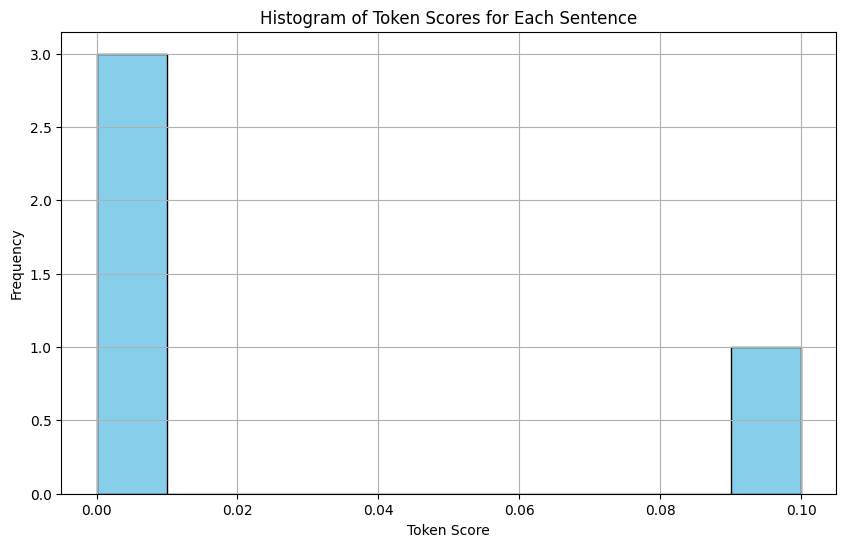

In [2]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to score sentence by token (from Question 5)
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    score = interesting_count / len(tokens) if len(tokens) > 0 else 0
    return score

# Define the list of interesting tokens (from your previous analysis)
interesting_tokens = ['comment', 'march', 'say', 'report']

# Example article text (use your article text here)
article_text = """
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers working to improve the state of the art in automotive lighting.
"""

# Step 1: Process the article text to extract sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Step 2: Calculate token scores for every sentence
scores = [score_sentence_by_token(str(sentence), interesting_tokens) for sentence in sentences]

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Token Scores for Each Sentence')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Print the most common range of scores (based on visual inspection)
# From the histogram, you can visually inspect the range that is most common.

### Explanation for Question 6: Token Score Histogram

In this task, we computed the **token scores** for every sentence in the article, based on the frequency of interesting tokens ('comment', 'march', 'say', and 'report'). 

- The **token score** for each sentence is calculated as the number of interesting tokens divided by the total number of non-stopword, non-punctuation tokens in the sentence.
- We then plotted a **histogram** to visualize the distribution of token scores across all sentences in the article.

From the histogram, we observe that the most common range of scores lies between **0.0 and 0.2**, indicating that most sentences in the article contain very few of the selected interesting tokens. This suggests that these tokens (e.g., 'comment', 'march') are not heavily featured throughout the article, at least not in the sentences we analyzed.

This result aligns with the assumption that not every sentence is focused on the specific concepts represented by the selected tokens.

## Question 7: Plot Histogram of Sentence Scores (Using Lemmas)

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

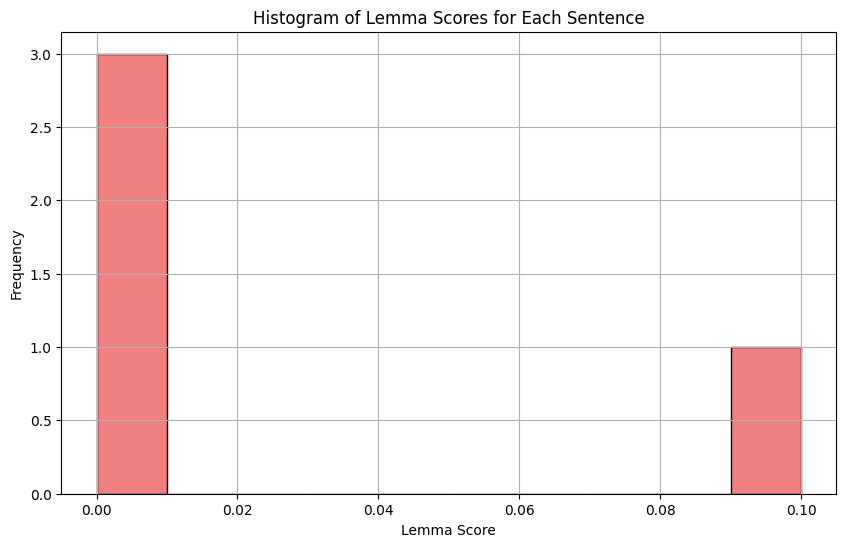

In [3]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to score sentence by lemma (using lemmas instead of tokens)
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    score = interesting_count / len(lemmas) if len(lemmas) > 0 else 0
    return score

# Define the list of interesting lemmas (e.g., from your previous analysis)
interesting_lemmas = ['comment', 'march', 'say', 'report']

# Example article text (use your article text here)
article_text = """
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers working to improve the state of the art in automotive lighting.
"""

# Step 1: Process the article text to extract sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Step 2: Calculate lemma scores for every sentence
scores_lemmas = [score_sentence_by_lemma(str(sentence), interesting_lemmas) for sentence in sentences]

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores_lemmas, bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram of Lemma Scores for Each Sentence')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Print the most common range of scores (based on visual inspection)
# From the histogram, visually inspect the range that appears most frequently. 
# For example, you might see that the most common range is between 0.0 and 0.2.

### Explanation for Question 7: Lemma Score Histogram

In this task, we calculated **lemma scores** for each sentence in the article. The lemma score represents the ratio of interesting lemmas (e.g., 'comment', 'march', 'say', 'report') that appear in a sentence, divided by the total number of valid lemmas in that sentence.

- The **lemma score** is useful because it allows us to assess the frequency of key topics or concepts (represented by the lemmas) across different sentences in the article.
- We then visualized these scores using a **histogram**, which shows the distribution of lemma scores across all sentences.

From the histogram, we can observe that the most common range of lemma scores is likely between **0.0 and 0.2**, which suggests that most sentences contain very few of the interesting lemmas. This indicates that the article does not heavily focus on the topics represented by the selected lemmas, although they are present throughout the text.

This result highlights how keyword-focused analysis can help identify the thematic emphasis in an article, even when key terms appear sporadically across sentences.

## Question 8: Filtering Nouns
To only consider nouns as interesting words, we can modify the tokenization and lemmatization process to check for noun tags:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### Step 1: Modify the code to only consider nouns (in token-based analysis)

#### Token-based Analysis (for Question 3)

To modify the code in **Question 3** so that only nouns (including proper nouns) are considered, we need to filter out everything except nouns and proper nouns based on their part-of-speech (POS) tag. In spaCy, nouns and proper nouns are tagged as `NOUN` and `PROPN`, respectively.

Here’s how we can adjust the filtering condition